In [16]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [17]:
import gym
env = gym.make('FrozenLake-v0')

In [18]:

pi = {0:1, 1:2, 2:1, 3:0, 4:1, 6:1, 8:2, 9:0, 10:1, 13:2, 14:2}
print(pi)

{0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 6: 1, 8: 2, 9: 0, 10: 1, 13: 2, 14: 2}


In [19]:

nb_episodes = 1000000
alpha = 0.05
gamma = 0.99
action_size = env.action_space.n
state_space_size = env.observation_space.n
epsilon=0.1

In [20]:

def compute_V(nb_episodes,policy,v = np.zeros(state_space_size)):
    
    for i in range(nb_episodes):
        done = False
        observation = env.reset()
        while not done: 
            action = policy[observation]
            new_observation, reward, done, info = env.step(action)
            v[observation] = v[observation] + alpha * (reward + gamma * v[new_observation] - v[observation])
            observation = new_observation
    return v


In [21]:
V = compute_V(nb_episodes,pi)
print(V)

[ 0.02489294  0.02555681  0.05079326  0.02147446  0.02879586  0.
  0.07941636  0.          0.03805486  0.13641117  0.25195514  0.          0.
  0.36998939  0.60067215  0.        ]


In [22]:


def action_epsilon_greedy(q,state, epsilon=0.1):
    if np.random.rand() > epsilon:
        return np.argmax(q[state])
    return np.random.randint(action_size)



In [23]:
def epsilon_greedy(epsilon):
    return lambda q,s: action_epsilon_greedy(q, s, epsilon=epsilon)

In [24]:

def test_performance(policy, nb_episodes=1000):
    sum_returns = 0
    for i in range(nb_episodes):
        state  = env.reset()
        done = False
        while not done:
            action = policy[state]
            state, reward, done, info = env.step(action)
            if done:
                sum_returns += reward
    return sum_returns/nb_episodes



In [25]:
def compute_Q_sarsa(nb_episodes,
                    policy,
                    q = np.zeros([state_space_size,action_size]),
                    env=env):
    progress = dict()
    for i in range(nb_episodes):
        done = False
        state = env.reset()
        action = action_epsilon_greedy(q, state, epsilon=epsilon)
        while not done:
            new_s, reward, done, info = env.step(action)
            new_a = action_epsilon_greedy(q, new_s, epsilon=epsilon)
            q[state, action] = q[state, action] + \
                                  alpha * (reward + gamma * \
                                        q[new_s, new_a] - q[state, action])
                
            policy[state] = np.argmax(q[state])
            state = new_s
            action = new_a
        if i%200000 == 0:
            progress[i] = test_performance(policy)
        
    return q,policy,progress

In [26]:

Q,new_pi,new_progress = compute_Q_sarsa(nb_episodes,pi)
print(Q)
print(new_pi)

[[ 0.31606579  0.27183517  0.28444412  0.27357125]
 [ 0.19452166  0.17377727  0.14720994  0.25416343]
 [ 0.21381992  0.21616924  0.21214884  0.21366969]
 [ 0.151066    0.15136259  0.13727567  0.2078015 ]
 [ 0.33250682  0.24210843  0.21424746  0.22430119]
 [ 0.          0.          0.          0.        ]
 [ 0.1868167   0.1868041   0.16332678  0.06047723]
 [ 0.          0.          0.          0.        ]
 [ 0.19262144  0.26856855  0.2835523   0.36831408]
 [ 0.33768762  0.46778329  0.28164534  0.27066345]
 [ 0.51727392  0.42058531  0.32438799  0.26578503]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.35579449  0.49053429  0.61278783  0.4661856 ]
 [ 0.62798401  0.81108464  0.70328047  0.71044952]
 [ 0.          0.          0.          0.        ]]
{0: 0, 1: 3, 2: 1, 3: 3, 4: 0, 6: 0, 8: 3, 9: 1, 10: 0, 13: 2, 14: 1}


In [27]:
def plot_performance(progress):
    plt.plot(progress.keys(),progress.values(),'-')
    plt.xlabel("epochs")
    plt.ylabel("average reward of an epoch")

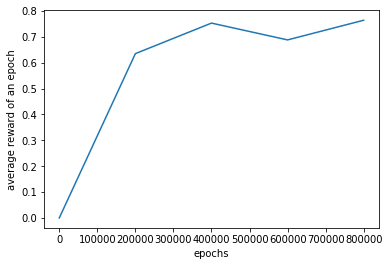

In [28]:
plot_performance(new_progress)

In [106]:
test_performance(new_pi)

0.73

In [107]:
pi = {0:1, 1:2, 2:1, 3:0, 4:1, 6:1, 8:2, 9:0, 10:1, 13:2, 14:2}
print(pi)

{0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 6: 1, 8: 2, 9: 0, 10: 1, 13: 2, 14: 2}


In [108]:
def compute_Q_Off(nb_episodes,policy,q = np.zeros([state_space_size,action_size]), env=env):
    
    for i in range(nb_episodes):
        done = False
        state = env.reset()
        while not done:
            action = action_epsilon_greedy(q, state) # behaviour policy 
            new_s, reward, done, info = env.step(action)
            a_max = np.argmax(q[new_s]) # target policy 
            q[state, action] = q[state, action] + alpha * \
                                     (reward + gamma * \
                                      q[new_s, a_max] - q[state, action])
            policy[state] = np.argmax(q[state])
            state = new_s
    return q,policy

In [109]:
Q_off,new_policy = compute_Q_Off(nb_episodes,pi)
print(Q_off)
print(new_policy)

[[ 0.54442648  0.52748328  0.52235742  0.51394911]
 [ 0.32837377  0.3514402   0.36350516  0.4786896 ]
 [ 0.41643963  0.4283406   0.39181186  0.44854423]
 [ 0.33659633  0.30176235  0.27704556  0.43735511]
 [ 0.55668702  0.36397023  0.4063599   0.40884347]
 [ 0.          0.          0.          0.        ]
 [ 0.2919618   0.18501376  0.24650655  0.21074759]
 [ 0.          0.          0.          0.        ]
 [ 0.31353496  0.35450571  0.32493774  0.57647188]
 [ 0.44769324  0.62039099  0.50089254  0.45507406]
 [ 0.55820045  0.48116658  0.47556583  0.35345751]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.35343295  0.52451831  0.74425935  0.51861865]
 [ 0.73712224  0.86500318  0.80066988  0.77180793]
 [ 0.          0.          0.          0.        ]]
{0: 0, 1: 3, 2: 3, 3: 3, 4: 0, 6: 0, 8: 3, 9: 1, 10: 0, 13: 2, 14: 1}


In [110]:
test_performance(new_pi)

0.74